In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
# Reading 2012 to 2014 file :
df_1 = pd.read_csv(r"C:\Users\ramya\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [3]:
# Reading 2015 to 2016 file :
df_2 = pd.read_csv(r"C:\Users\ramya\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [4]:
# Reading 2017 to onwards:
df_3 = pd.read_csv(r"C:\Users\ramya\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [5]:
# df_1 doesn't have "remaining_lease" so i choose df_2, df_3 only

# Concating dataframes
df_4 = pd.concat([df_2, df_3], axis = 0)
df_4.reset_index(drop = True, inplace = True)
df_4.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
222016,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 01 month,865000.0
222017,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63 years 01 month,880000.0
222018,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
222019,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0
222020,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 02 months,775000.0


In [6]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222021 entries, 0 to 222020
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                222021 non-null  object 
 1   town                 222021 non-null  object 
 2   flat_type            222021 non-null  object 
 3   block                222021 non-null  object 
 4   street_name          222021 non-null  object 
 5   storey_range         222021 non-null  object 
 6   floor_area_sqm       222021 non-null  float64
 7   flat_model           222021 non-null  object 
 8   lease_commence_date  222021 non-null  int64  
 9   remaining_lease      222021 non-null  object 
 10  resale_price         222021 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.6+ MB


In [7]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
# This dataframe doesn't have null values

In [9]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [10]:
df_4["address"] = df_4["block"] + " " + df_4["street_name"]

In [11]:
df_5 = df_4.drop(columns= ["block", "street_name"])

In [12]:
df_5.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4


In [13]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [14]:
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month

In [15]:
df_5.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,2015


In [16]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [18]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [19]:
# Choosing the "LabelEncoder" for "town" and "OrdinalEncoder" for "flat_type" and "flat_model"

df_5["town"] = LabelEncoder().fit_transform(df_5["town"])
df_5["flat_type"] = OrdinalEncoder().fit_transform(df_5[["flat_type"]])
df_5["flat_model"] = OrdinalEncoder().fit_transform(df_5[["flat_model"]])

In [20]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [21]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [22]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [23]:
df_5.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
222016,7,25,5.0,04 TO 06,146.0,7.0,1988,63 years 01 month,865000.0,352 YISHUN RING RD,2024
222017,7,25,5.0,10 TO 12,145.0,3.0,1988,63 years 01 month,880000.0,359 YISHUN RING RD,2024
222018,7,25,5.0,01 TO 03,146.0,7.0,1985,60 years 03 months,770000.0,277 YISHUN ST 22,2024
222019,7,25,5.0,04 TO 06,146.0,7.0,1985,60 years 02 months,800000.0,277 YISHUN ST 22,2024
222020,7,25,5.0,01 TO 03,146.0,7.0,1985,60 years 02 months,775000.0,277 YISHUN ST 22,2024


In [24]:
df_5[["storey_start", "storey_end"]] = df_5["storey_range"].str.split("TO", expand = True)

In [25]:
# droping the "storey_range" column:
df_5.drop(columns = ["storey_range"], inplace = True)

In [26]:
df_5.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,01,03


In [27]:
df_5["address"].nunique()

9595

In [28]:
# Address have 9595 unique value for 222020, so i encode it for the correlation checking
# I choosing "LabelEncoder" for the "address" column

df_5["address"] = LabelEncoder().fit_transform(df_5["address"])

In [29]:
df_5["storey_start"] = df_5["storey_start"].astype(int)
df_5["storey_end"] = df_5["storey_end"].astype(int)

In [30]:
# "remaining_lease" have "60 years 8 months" this type of data
# so we want to split the year and month separately for the correlation checking

slice_values = []
for i in df_5["remaining_lease"].astype(str):
    j = i.replace("years","")
    k = j.replace("months","")
    l = k.replace("month","")
    m = l.strip()
    n = m.split("  ")
    slice_values.append(n)

In [31]:
df_data = pd.DataFrame(slice_values, columns=["remaining_lease_year", "remaining_lease_month"])

In [32]:
df_data["remaining_lease_year"] = df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"] = df_data["remaining_lease_month"].fillna(0).astype(int)

In [33]:
df_5.drop(columns=["remaining_lease"], inplace = True)

In [34]:
df_6 = pd.concat([df_5, df_data], axis = 1)

In [35]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [36]:
df_7 = df_6[['year', 'month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 'storey_start', 'storey_end',
             'remaining_lease_year', 'remaining_lease_month', 'lease_commence_date', 'resale_price']]

In [37]:
df_8 = df_7.sort_values(by = ["year","month"])

In [38]:
df_8.to_csv("ResaleFlatPrices.csv" , index = False)

In [39]:
# Checking the correlation using heatmap

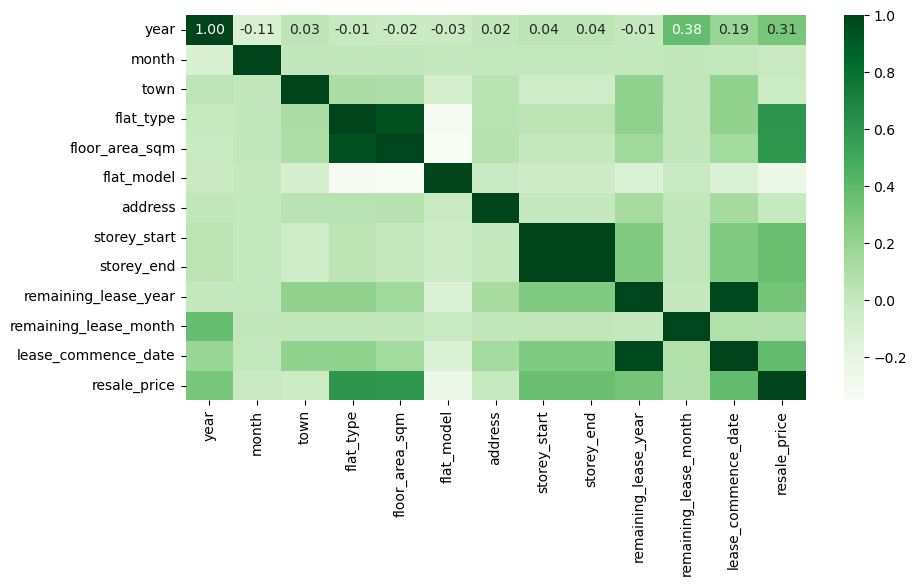

In [42]:
df_8_corr = df_8.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df_8_corr, annot = True, cmap = "Greens", fmt = ".2f")
plt.show()

In [43]:
df_final = pd.read_csv(r"C:\Users\ramya\ResaleFlatPrices.csv")
df_final.head(3)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6600,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1469,1,3,64,0,1980,285000.0


In [44]:
# Checking the duplicate values

df_final.duplicated().sum()

312

In [45]:
df_final_1 = df_final.drop_duplicates()
df_final_1.reset_index(drop = True, inplace = True)

In [46]:
df_final_1.tail(3)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
221706,2024,7,25,5.0,146.0,7.0,3286,1,3,60,3,1985,770000.0
221707,2024,7,25,5.0,146.0,7.0,3286,4,6,60,2,1985,800000.0
221708,2024,7,25,5.0,146.0,7.0,3286,1,3,60,2,1985,775000.0


In [47]:
# the month and address columns has very low correlation with other features 
# So i drop the month and address column

In [48]:
df_final_2 = df_final_1.drop(columns=["month","address"])

In [49]:
df_final_2.tail()

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
221704,2024,25,5.0,146.0,7.0,4,6,63,1,1988,865000.0
221705,2024,25,5.0,145.0,3.0,10,12,63,1,1988,880000.0
221706,2024,25,5.0,146.0,7.0,1,3,60,3,1985,770000.0
221707,2024,25,5.0,146.0,7.0,4,6,60,2,1985,800000.0
221708,2024,25,5.0,146.0,7.0,1,3,60,2,1985,775000.0


In [50]:
# Detecting the skewed columns using plot
def plot(df, column):
    #distplot
    plt.figure(figsize = (15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot for" + " " + column)

    #histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde = True, bins = 30, color = "salmon")
    plt.title("Histogram plot for" + " " + column)

    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df, x = column)
    plt.title("Box Plot for" + " " + column)
    

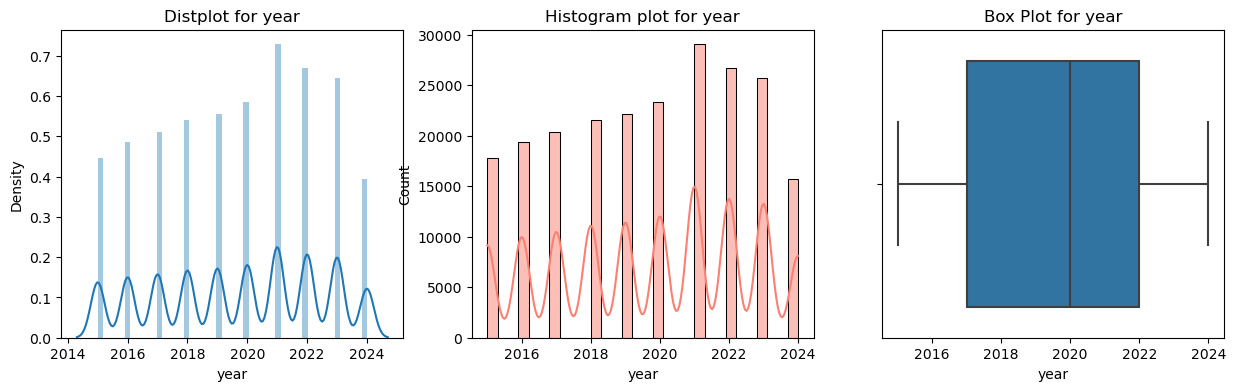

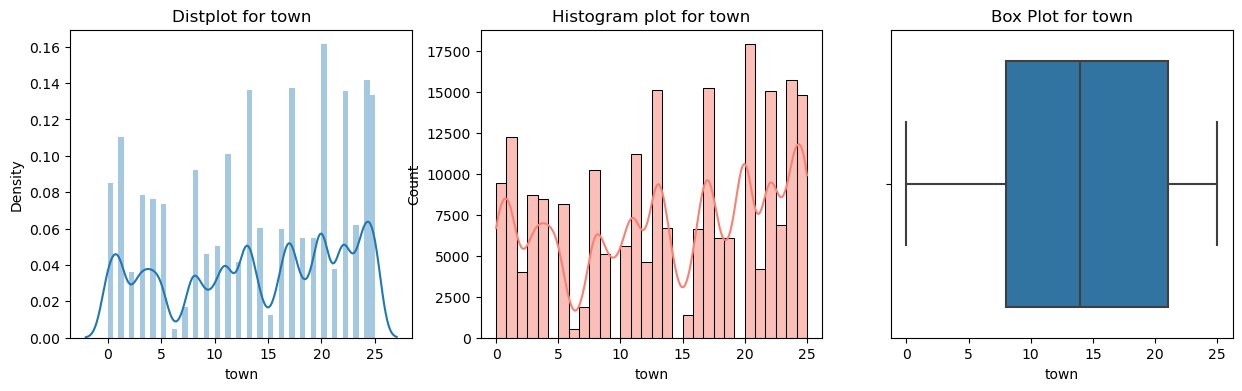

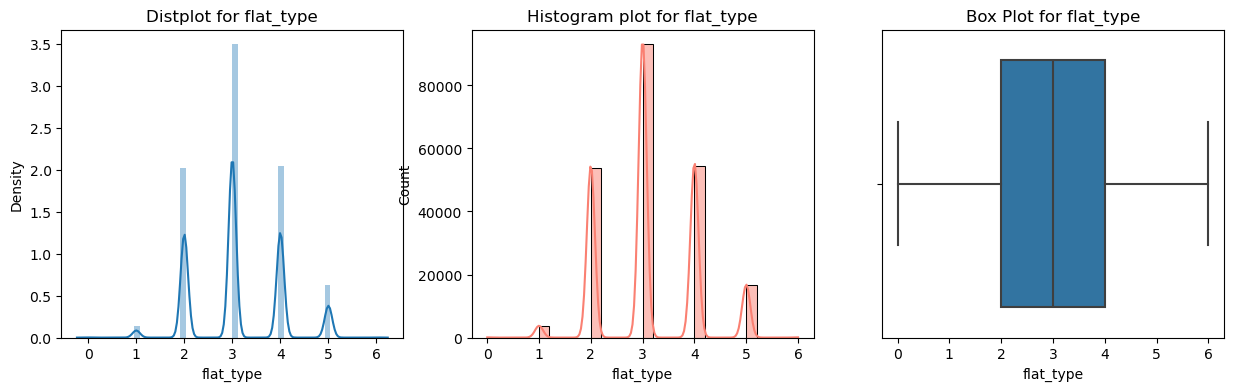

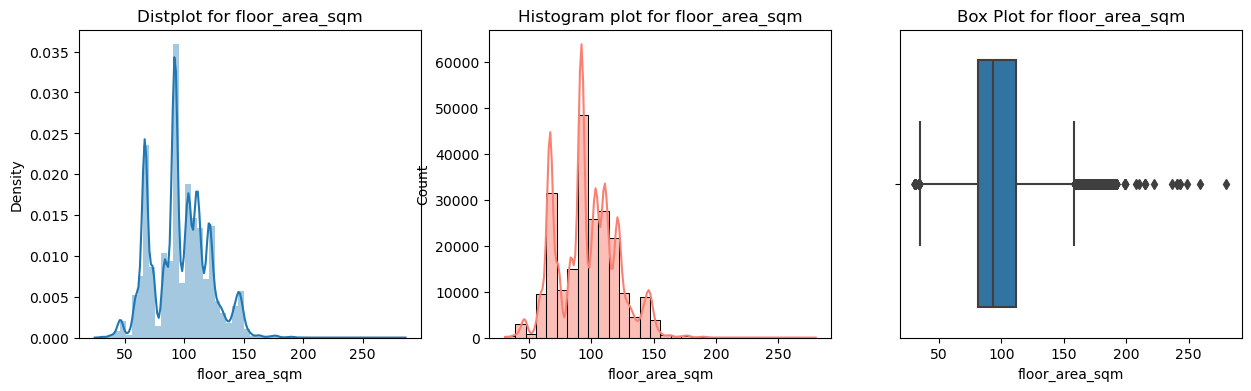

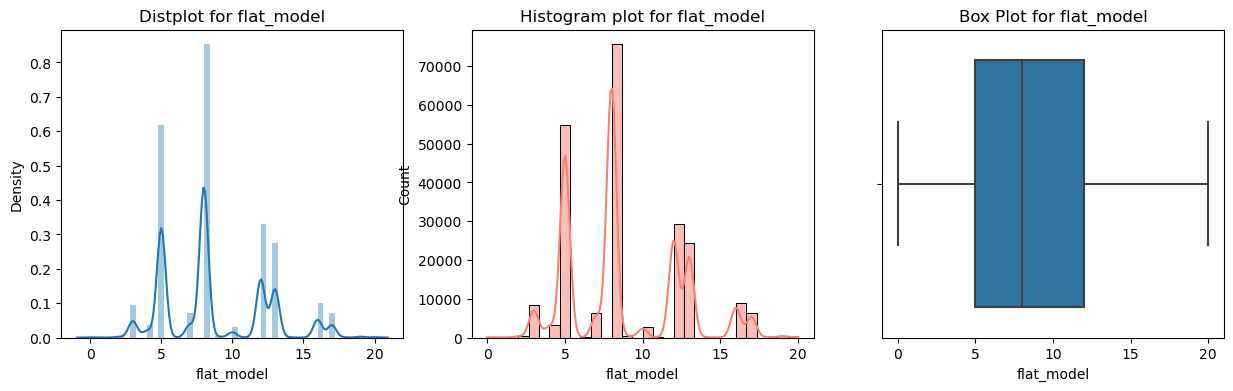

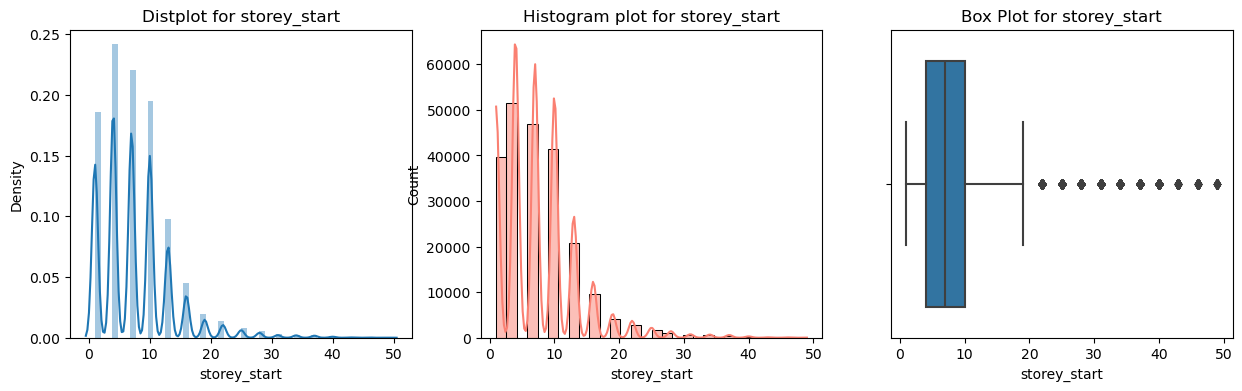

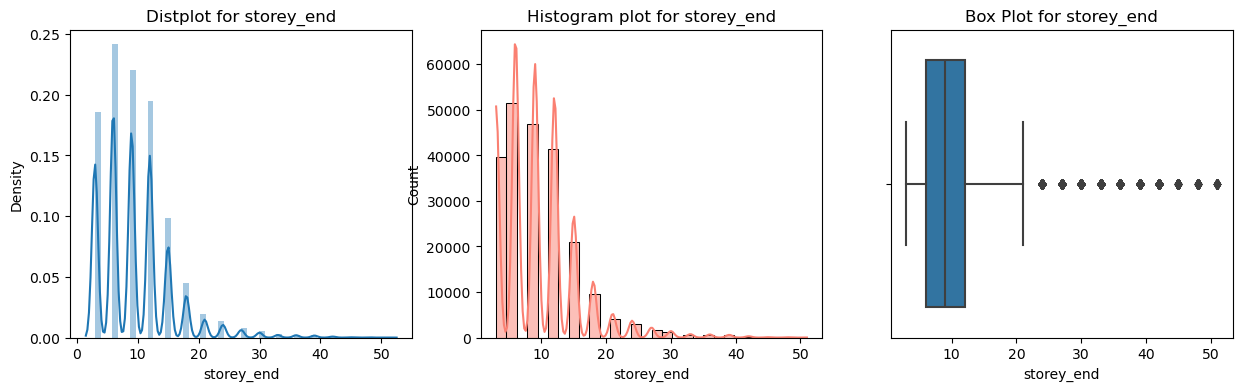

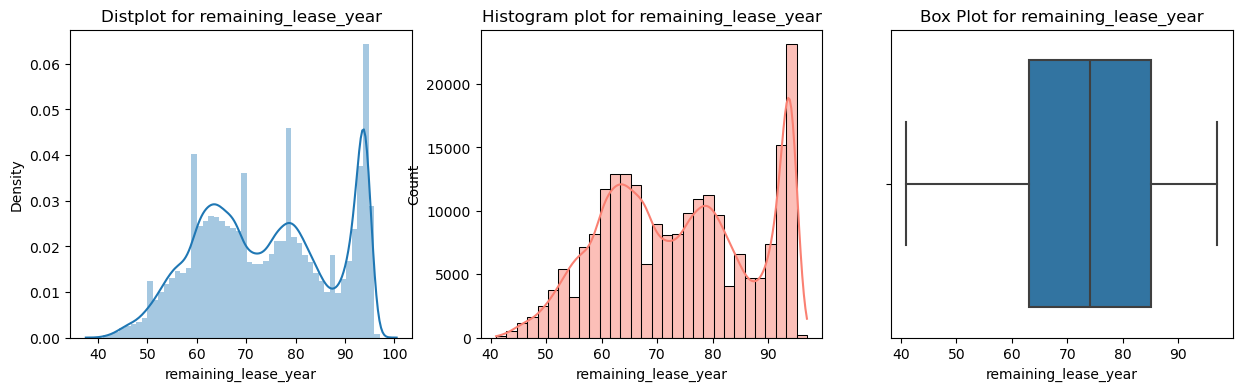

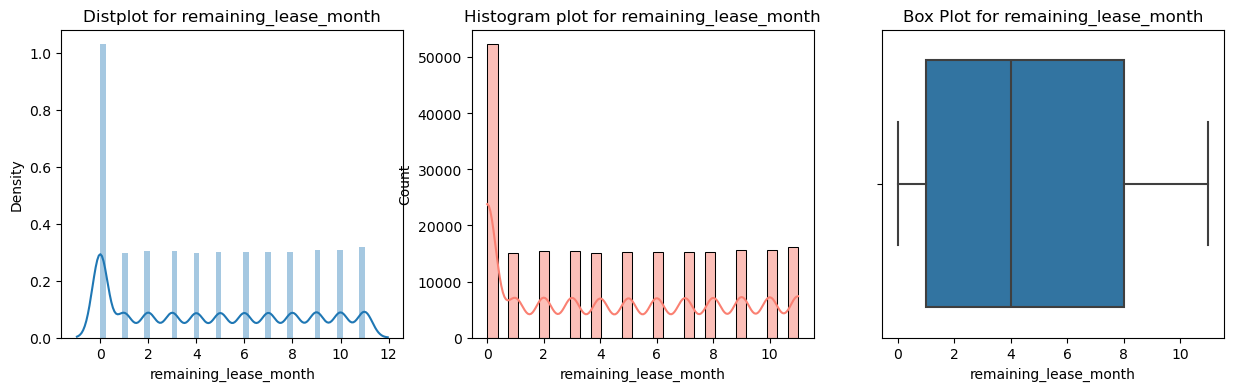

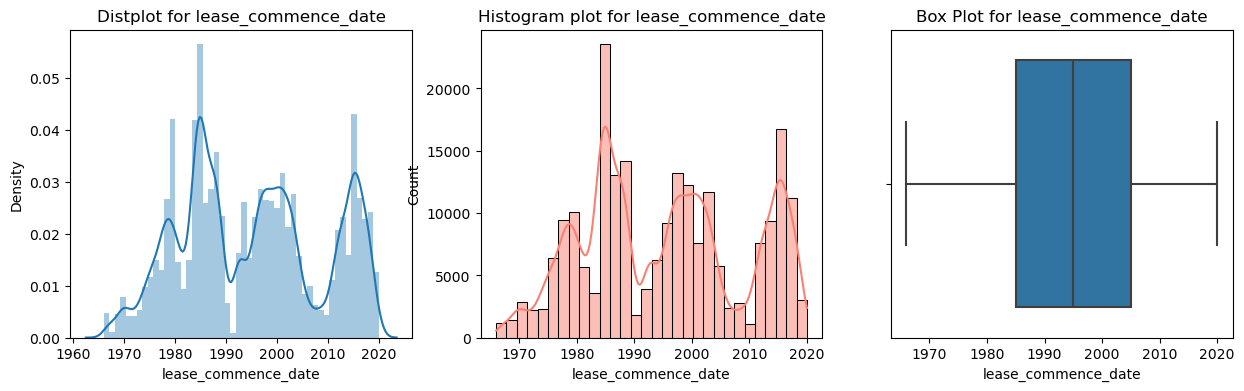

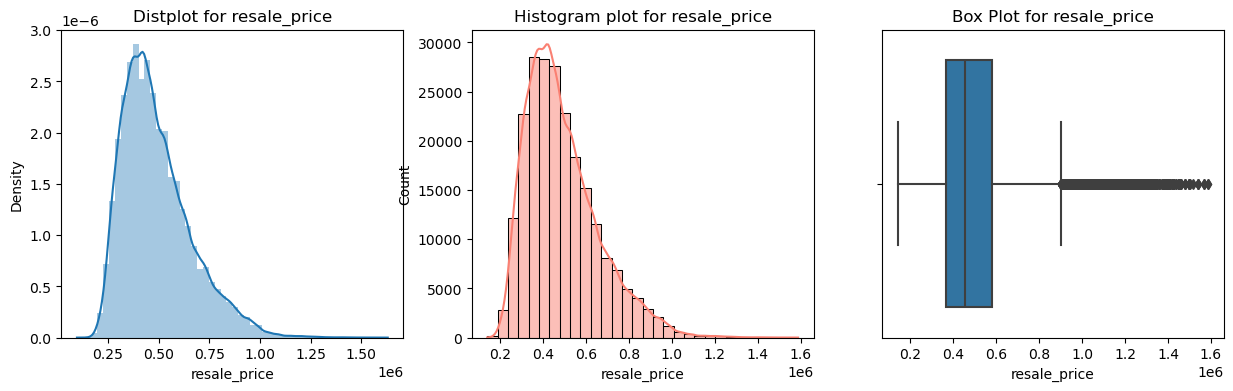

In [51]:
for i in df_final_2.columns:
    plot(df_final_2, i)

In [52]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,221709.0,2019.684081,2.721527,2015.0,2017.0,2020.0,2022.0,2024.0
town,221709.0,13.892386,7.957133,0.0,8.0,14.0,21.0,25.0
flat_type,221709.0,3.119706,0.919434,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,221709.0,97.100844,24.061162,31.0,81.0,93.0,112.0,280.0
flat_model,221709.0,8.688258,3.643648,0.0,5.0,8.0,12.0,20.0
storey_start,221709.0,7.660433,5.845094,1.0,4.0,7.0,10.0,49.0
storey_end,221709.0,9.660433,5.845094,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,221709.0,74.082446,13.513012,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,221709.0,4.616412,3.779123,0.0,1.0,4.0,8.0,11.0
lease_commence_date,221709.0,1995.200019,13.720459,1966.0,1985.0,1995.0,2005.0,2020.0


In [53]:
df_final_3 = df_final_2.copy()

In [54]:
df_final_3["storey_start"] = np.log(df_final_3["storey_start"])
df_final_3["storey_end"] = np.log(df_final_3["storey_end"])
df_final_3["resale_price"] = np.log(df_final_3["resale_price"])

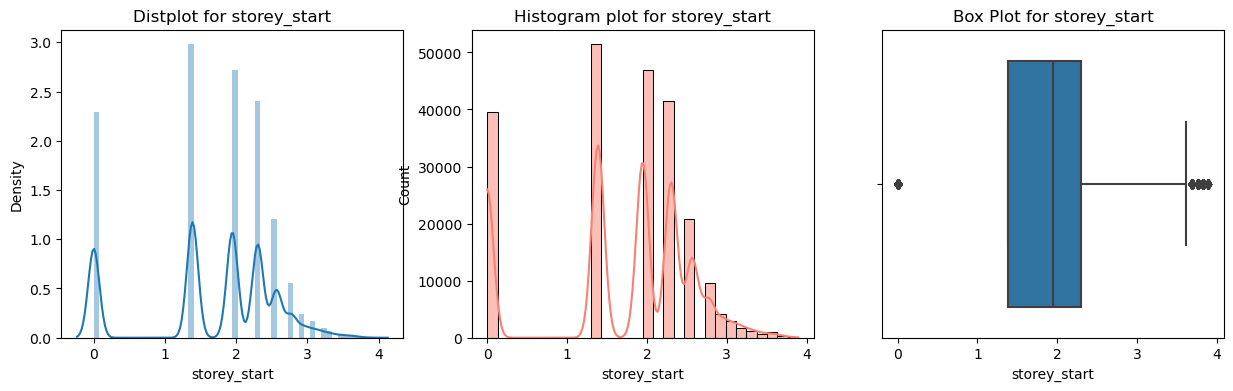

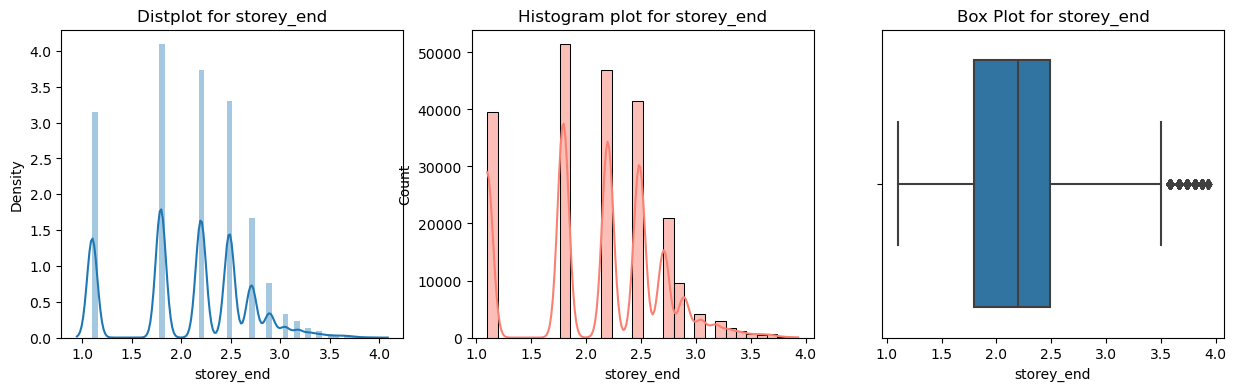

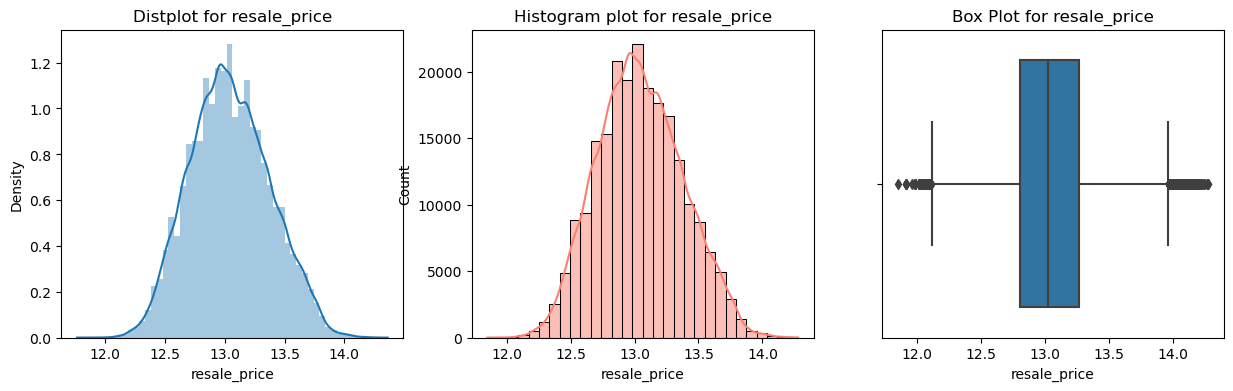

In [55]:
skewed_columns = ["storey_start", "storey_end", "resale_price"]
for i in skewed_columns:
    plot(df_final_3, i)

In [56]:
df_final_4 = df_final_3.copy()

In [57]:
# Recorrecting the outliers:
# The Outlier Columns Are
# 1.floor_area_sqm
# 2.storey_start
# 3.storey_end
# 4.resale_price

In [58]:
# ex: lower threshold : 5 and upper threshold : 20
# above upper threshold values(>20) are converted into upper threshold value (20) in features
# below lower threshold values(<5) are converted into lower threshold value (5) in feature

In [59]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [60]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

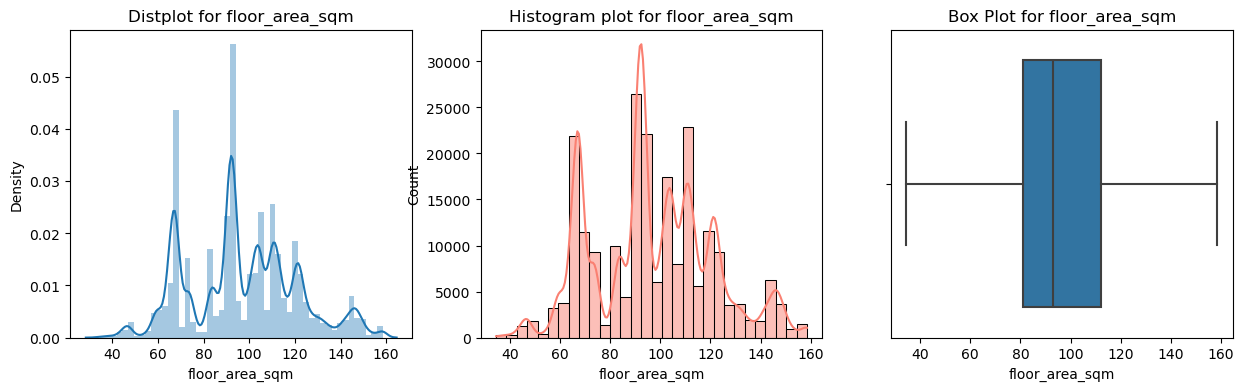

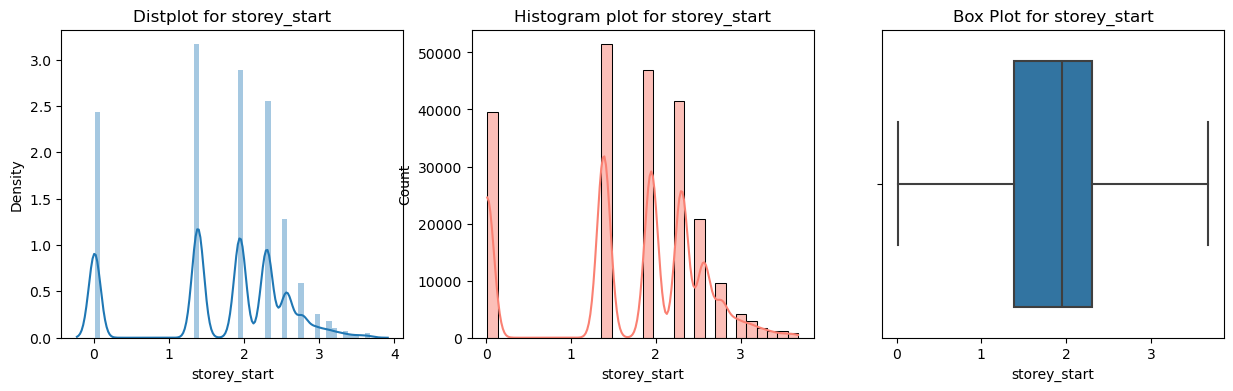

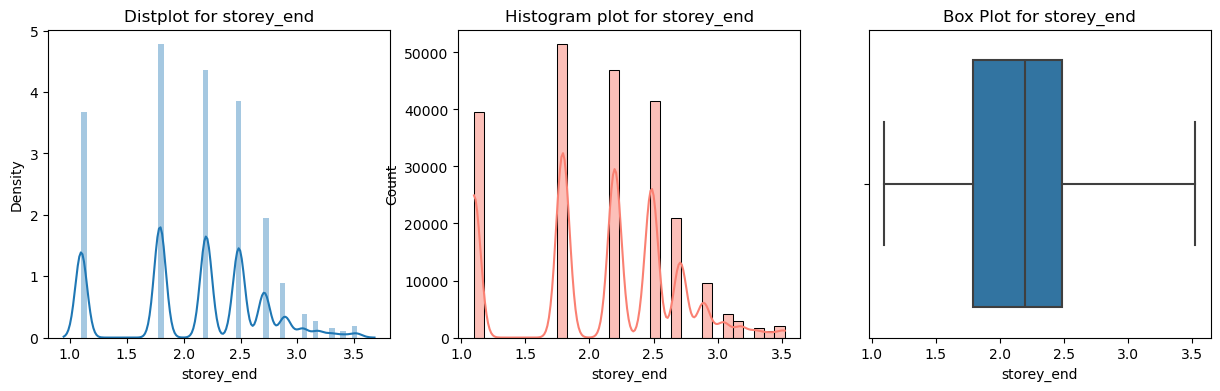

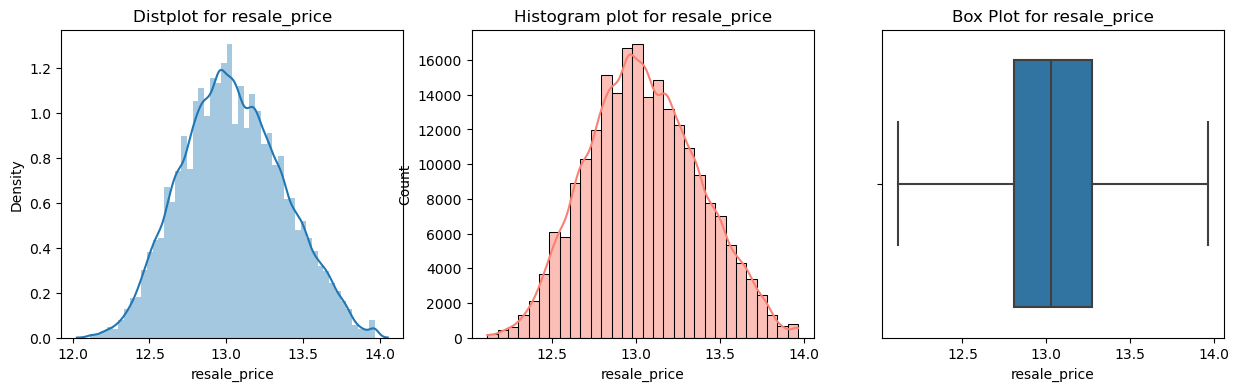

In [61]:
for k in outlier_columns:
    plot(df_final_4,k)

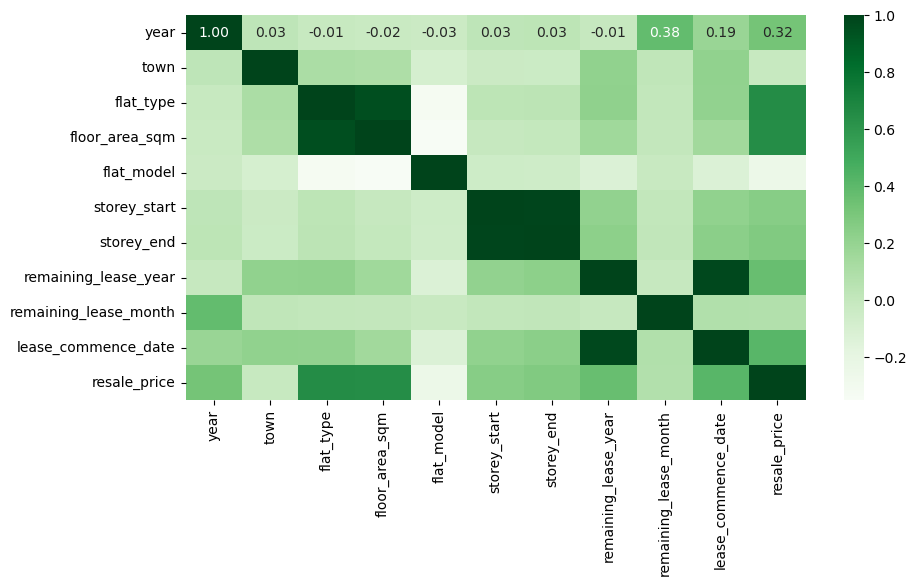

In [62]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap = "Greens", fmt = "0.2f")
plt.show()

In [63]:
df_final_5 = df_final_4.copy()

In [64]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,221709.0,2019.684081,2.721527,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,221709.0,13.892386,7.957133,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,221709.0,3.119706,0.919434,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,221709.0,97.027503,23.827184,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,221709.0,8.688258,3.643648,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,221709.0,1.695845,0.920970,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,221709.0,2.093569,0.601375,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,221709.0,74.082446,13.513012,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,221709.0,4.616412,3.779123,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,221709.0,1995.200019,13.720459,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [65]:
np.exp(13.965480)

1161798.7399814494

In [66]:
# Checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 13.965480]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6600,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1469,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5437,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6754,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221704,2024,7,25,5.0,146.0,7.0,4428,4,6,63,1,1988,865000.0
221705,2024,7,25,5.0,145.0,3.0,4499,10,12,63,1,1988,880000.0
221706,2024,7,25,5.0,146.0,7.0,3286,1,3,60,3,1985,770000.0
221707,2024,7,25,5.0,146.0,7.0,3286,4,6,60,2,1985,800000.0


In [67]:
np.exp(12.104561)

180694.13157722994

In [68]:
# Checking how many dates are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8087,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6208,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3560,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1417,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8087,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5848,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2347,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8087,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6380,7,9,91,3,2015,150000.0


In [69]:
# Now we want to create the model for "resale_price" prediction
# Importing the model for ML prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [70]:
# Train test split for model selection
def select_model(df, algorithm):
    # x, y splitting
    x = df.drop(columns=['resale_price'])
    y = df['resale_price']

    X_train, X_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state = 42)

    model = algorithm().fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Checking the accuracy score
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    train_metrics = {"Data" : "Train_Data",
                     "Name" : algorithm.__name__,
                     "R2_Score" : train_r2,
                     "Mean_Squared_Error" : train_mse,
                     "Root_Mean_Squared_Error" : train_rmse,
                     "Mean_Absolute_Error" : train_mae}

    test_metrics = {"Date" : "Test_Data",
                    "Name" : algorithm.__name__,
                    "R2_Score" : test_r2,
                    "Mean_Squared_Error" : test_mse,
                    "Root_Mean_Squared_Error" : test_rmse,
                    "Mean_Absolute_Error" : test_mae}

    print(train_metrics)
    print(test_metrics)

In [71]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train_Data', 'Name': 'LinearRegression', 'R2_Score': 0.6778350282236099, 'Mean_Squared_Error': 0.03562269391666049, 'Root_Mean_Squared_Error': 0.18873975181890137, 'Mean_Absolute_Error': 0.14772550004952933}
{'Date': 'Test_Data', 'Name': 'LinearRegression', 'R2_Score': 0.677862414686429, 'Mean_Squared_Error': 0.035519177026130756, 'Root_Mean_Squared_Error': 0.1884653204866369, 'Mean_Absolute_Error': 0.14744731533710453}
{'Data': 'Train_Data', 'Name': 'DecisionTreeRegressor', 'R2_Score': 0.9962554772842839, 'Mean_Squared_Error': 0.0004140424883265096, 'Root_Mean_Squared_Error': 0.020348034016251043, 'Mean_Absolute_Error': 0.007231426252012794}
{'Date': 'Test_Data', 'Name': 'DecisionTreeRegressor', 'R2_Score': 0.9273266764694644, 'Mean_Squared_Error': 0.008013025369410755, 'Root_Mean_Squared_Error': 0.08951550351425587, 'Mean_Absolute_Error': 0.06382927132122308}
{'Data': 'Train_Data', 'Name': 'RandomForestRegressor', 'R2_Score': 0.9911961544971751, 'Mean_Squared_Error': 0.0009

In [72]:
# RandomForestRegressor have fair interpretability
# It will detect the unseen data for this datas (without overfitting)
# So I select this algorithm

In [73]:
x = df_final_5.drop(columns=['resale_price'])
y = df_final_5['resale_price']

X_train, X_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state=42)

model = RandomForestRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

metrics = {"Data" : "Test_Data",
           "Name" : RandomForestRegressor.__name__,
           "Mean_Squared_Error" : test_mse,
           "Root_Mean_Squared_Errr" : test_rmse,
           "Mean_Absolute_Error" : test_mae,
           "R2_Score" : test_r2}
print(metrics)

{'Data': 'Test_Data', 'Name': 'RandomForestRegressor', 'Mean_Squared_Error': 0.00490323514962328, 'Root_Mean_Squared_Errr': 0.07002310439864316, 'Mean_Absolute_Error': 0.05132713922031409, 'R2_Score': 0.9555306044911387}


In [74]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [75]:
print(np.log(df_final_5['storey_start'].min()))
print(np.log(df_final_5['storey_start'].max()))

-4.434730328794439
1.3021029653716825


In [76]:
np.exp(12.815838)

367999.92008841544

In [77]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred = model.predict(user_data)
y_pred[0]

12.796784640654302

In [78]:
np.exp(12.809278160812472)

365593.80029929086

In [79]:
# Saving the Model using pickle
with open("Singapore_Flat_Price.pkl", "wb") as f:
    pickle.dump(model, f)

In [80]:
with open("Singapore_Flat_Price.pkl", "rb") as f1:
    regg_model = pickle.load(f1)

In [81]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred= regg_model.predict(user_data)
y_pred[0]

12.300420120847646

In [82]:
np.exp(12.271239518792136)

213467.4239101743